In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Importing the necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import re
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import string
import nltk
nltk.download('vader_lexicon')
import warnings 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Reading the CSV files

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/train_E6oV3lV.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/test_tweets_anuFYb8.csv')
df_sample = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/sample_submission_gfvA5FD.csv') 

## Data Analysis

In [ ]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df_train.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
df_train['tweet'].dtype

dtype('O')

In [ ]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
print("Percentage null or na values in df_train")
(df_train.isnull() | df_train.isna()).sum() * 100 / df_train.index.size

Percentage null or na values in df_train


id       0.0
label    0.0
tweet    0.0
dtype: float64

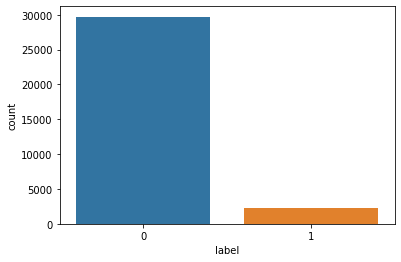

In [ ]:
sns.countplot(x='label',data=df_train)

In [ ]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
df_test.isna().sum()

id       0
tweet    0
dtype: int64

In [ ]:
df_test.describe()

,id
count,17197.000000
mean,40561.000000
std,4964.490625
min,31963.000000
25%,36262.000000
50%,40561.000000
75%,44860.000000
max,49159.000000


##Data Cleaning

In [ ]:
#Concatinating the train and test data so both can be cleanse together: A new column (Dateset) created to indicate where each row belongs
df_train['Dataset'] = 'train'
df_test['Dataset'] = 'test'
df_full = pd.concat([df_train, df_test])
df_full.tail()

,id,label,tweet,Dataset
17192,49155,NaN,thought factory: left-right polarisation! #tru...,test
17193,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,test
17194,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,test
17195,49158,NaN,"happy, at work conference: right mindset leads...",test
17196,49159,NaN,"my song ""so glad"" free download! #shoegaze ...",test


In [ ]:
df_full['clean'] = df_full['tweet'].str.replace('\@user', '') #Removing Twitter Handles (@user) and Hashtag tags
df_full['clean'] = df_full['clean'].str.replace('#', '') #Removing Hashtag tags
df_full['clean'] = df_full['clean'].str.replace("[^a-zA-Z#]", ' ') #Removing Punctuations, Numbers, and Special Characters
df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #Removing Short Words
df_full['clean'] = df_full['clean'].str.lower() #changing everything to a lower case

In [ ]:
# df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #Removing Short Words




# lambda x: ' '.join([w for w in x.split() if len(w)>3])
# ' '.join([w for w in x.split() if len(w)>3]
#         [w for w in x.split() if len(w)>3]
#            for w in x.split()
#             if len(w)>3]

In [ ]:
df_full.head()

,id,label,tweet,Dataset,clean
0,1,0.0,@user when a father is dysfunctional and is s...,train,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,thanks lyft credit cause they offer wheelchair...
2,3,0.0,bihday your majesty,train,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,train,model love take with time
4,5,0.0,factsguide: society now #motivation,train,factsguide society motivation


In [ ]:
#splitting every word in the tweets to form a single list
words = df_full['clean'].str.split()
words = [word for sublist in words for word in sublist]

#Counting the words to get a hint on the frequency of word
from collections import Counter
word_counts = Counter(words)
word_counts.most_common(20)

[('love', 4273),
 ('this', 4140),
 ('with', 3881),
 ('that', 3194),
 ('your', 2651),
 ('happy', 2651),
 ('have', 2487),
 ('just', 2105),
 ('will', 1953),
 ('when', 1911),
 ('what', 1847),
 ('life', 1775),
 ('time', 1771),
 ('like', 1700),
 ('today', 1685),
 ('from', 1650),
 ('thankful', 1436),
 ('positive', 1427),
 ('people', 1362),
 ('bihday', 1344)]

In [ ]:
c_words = pd.DataFrame(word_counts.most_common(20))
c_words.columns = ['Common_words','count']
c_words

,Common_words,count
0,love,4273
1,this,4140
2,with,3881
3,that,3194
4,your,2651
5,happy,2651
6,have,2487
7,just,2105
8,will,1953
9,when,1911


In [ ]:
fig = px.bar(c_words, x="count", y="Common_words", title='Common Words in Clean Tweet', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
# #Creating a column which contains the filtered tweets of the words that are needless
import spacy
nlp=spacy.load("en_core_web_sm")
nlp.max_length = 2740000

df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([token.lemma_ for token in nlp(x) if not token.is_stop]))
df_full.head(15)

,id,label,tweet,Dataset,clean
0,1,0.0,@user when a father is dysfunctional and is s...,train,father dysfunctional selfish drag kid dysfunction
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,thank lyft credit cause offer wheelchair van d...
2,3,0.0,bihday your majesty,train,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,train,model love time
4,5,0.0,factsguide: society now #motivation,train,factsguide society motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,train,huge fare talk leave chaos dispute allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @use...,train,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,train,school year year exam think school exam hate i...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,train,love land allin cavs champions cleveland cleve...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,train,welcome


In [ ]:
df_full['date'] = df_full['clean'].apply(lambda x: len([entity for entity in nlp(x).ents if entity.label_ == 'DATE']))

In [ ]:
df_full.head(10)

,id,label,tweet,Dataset,clean,date
0,1,0.0,@user when a father is dysfunctional and is s...,train,father dysfunctional selfish drag kid dysfunction,0
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,thank lyft credit cause offer wheelchair van d...,0
2,3,0.0,bihday your majesty,train,bihday majesty,1
3,4,0.0,#model i love u take with u all the time in ...,train,model love time,0
4,5,0.0,factsguide: society now #motivation,train,factsguide society motivation,0
5,6,0.0,[2/2] huge fan fare and big talking before the...,train,huge fare talk leave chaos dispute allshowandnogo,0
6,7,0.0,@user camping tomorrow @user @user @user @use...,train,camping tomorrow danny,1
7,8,0.0,the next school year is the year for exams.ð...,train,school year year exam think school exam hate i...,1
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,train,love land allin cavs champions cleveland cleve...,0
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,train,welcome,0


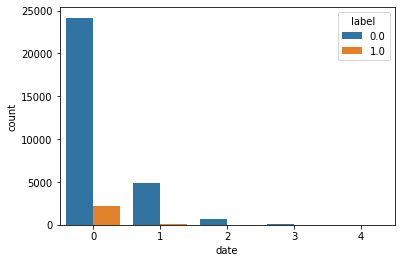

In [ ]:
sns.countplot(x='date', hue='label', data=df_full)

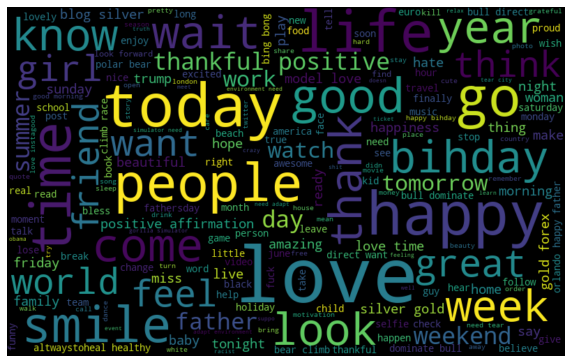

In [ ]:
all_words = ' '.join([text for text in df_full['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

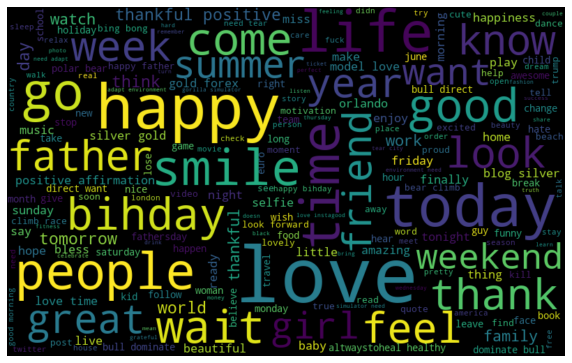

In [ ]:
normal_words =' '.join([text for text in df_full['clean'][df_full['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

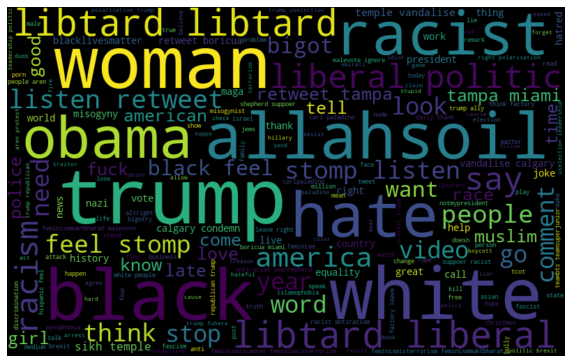

In [ ]:
negative_words = ' '.join([text for text in df_full['clean'][df_full['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

df_full['scores'] = df_full['clean'].apply(lambda x: vader.polarity_scores(x))
df_full.head(20)

#The score indicates neg for negative, neu for neutral, pos for positive, and finally the compound.
#the first row(id = 1) shows the tweet is 71.7% negative
#the compound value is basically the normal of the 3 values negative, positive and neutral

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



,id,label,tweet,Dataset,clean,date,scores
0,1,0.0,@user when a father is dysfunctional and is s...,train,father dysfunctional selfish drag kid dysfunction,0,"{'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'comp..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,thank lyft credit cause offer wheelchair van d...,0,"{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'comp..."
2,3,0.0,bihday your majesty,train,bihday majesty,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,4,0.0,#model i love u take with u all the time in ...,train,model love time,0,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp..."
4,5,0.0,factsguide: society now #motivation,train,factsguide society motivation,0,"{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp..."
5,6,0.0,[2/2] huge fan fare and big talking before the...,train,huge fare talk leave chaos dispute allshowandnogo,0,"{'neg': 0.589, 'neu': 0.233, 'pos': 0.178, 'co..."
6,7,0.0,@user camping tomorrow @user @user @user @use...,train,camping tomorrow danny,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,8,0.0,the next school year is the year for exams.ð...,train,school year year exam think school exam hate i...,1,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp..."
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,train,love land allin cavs champions cleveland cleve...,0,"{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'comp..."
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,train,welcome,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


## TF-IDF Features

In [ ]:
new_df_train = df_full.loc[df_full['Dataset']=='train']
X = new_df_train['clean']
y = new_df_train['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(new_df_train['clean'])
print(X.toarray())
#This is known as Term frequency - Inverse Document frequency
#TF  = (Frequency of a word in the document)/(Total words in the document)
#IDF = Log((Total number of docs)/(Number of docs containing the word))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.67810445 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Dividing Data into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #The data is split in the standard 80, 20 ratio

## Training the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Predictions and Evaluating of the Model

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions)) #performance measurement
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[5922   63]
 [ 346   62]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      5985
         1.0       0.50      0.15      0.23       408

    accuracy                           0.94      6393
   macro avg       0.72      0.57      0.60      6393
weighted avg       0.92      0.94      0.92      6393

0.9360237760050055


[[5949   36]
 [ 347   61]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      5985
         1.0       0.63      0.15      0.24       408

    accuracy                           0.94      6393
   macro avg       0.79      0.57      0.61      6393
weighted avg       0.92      0.94      0.92      6393

0.9400907242296261

## SPACY

## 1. The Document Object

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
nlp.max_length = 2740000 

clean_string = ', '.join([str(i) for i in df_full['clean']]) #the clean column converted to string because nlp takes in only strings and not series or dataframe
clean_document = nlp(clean_string)
#type(clean_document)

## 2. Tokenization with spaCy

In [ ]:
# Printing the tokens of the clean data
for token in clean_document:
  print(token.text)

Streaming output truncated to the last 5000 lines.
weekend
,
fact
america
hate
group
root
whitesupremacy
,
orlando
sympathy
family
true
islam
judaism
christianity
allow
,
neymar
happy
barcelona
despite
interest
club
ribeiro
neymar
attract
interest
,
away
toilet
leagueoflegendsfail
,
troi
time
skate
skater
frikiegirl
skating
arena
,
devastate
journalist
misogyny
rode
journalistic
integrity
press
despise
,
look
life
soulfood
thursdaythought
thankfulthursday
,
thank
shout
suppoe
writer
like
aquarrelcalled
stewardsoftheplane
magick
,
grab
bargain
join
today
midday
special
code
bargain
,
watch
make
miss
brother
loser
lad
,
caturday
petey
dallas
,
stack
overflow
post
lasting
legacy
world
,
happy
father
square
slate
shop
cool
home
,
feminismiscancer
feminismisterrorism
feminismmuktbharat
malevote
ignore
,
france
recent
terrorist
attack
english
fan
find
police
totally
unsympathetic
,
shitty
year
go
to
bad
trump
brexit
islamophobia
terrorism
altright
inequality
hate
,
lovely
view
home
glad
lula

In [ ]:
for token in clean_document:
    print(token.text, token.pos_, token.dep_)
#the pos_ marks the core part-of-speech categories(noun, verb, etc.)
#the dep_ indicates Syntactic dependency relation
#spacy.explain('PROPN')
#spacy.explain('dobj')

#All there can be found here https://spacy.io/usage/spacy-101 and https://spacy.io/api/token

Streaming output truncated to the last 5000 lines.
weekend NOUN conj
, PUNCT punct
fact NOUN compound
america PROPN compound
hate PROPN compound
group PROPN compound
root PROPN compound
whitesupremacy PROPN conj
, PUNCT punct
orlando PROPN compound
sympathy PROPN compound
family NOUN intj
true ADJ amod
islam PROPN compound
judaism PROPN compound
christianity PROPN nsubj
allow PROPN ROOT
, PUNCT punct
neymar PROPN nmod
happy ADJ amod
barcelona PROPN nsubj
despite SCONJ prep
interest NOUN compound
club PROPN compound
ribeiro PROPN compound
neymar PROPN nsubj
attract PROPN ccomp
interest NOUN dobj
, PUNCT punct
away ADV advmod
toilet NOUN compound
leagueoflegendsfail NOUN pobj
, PUNCT punct
troi ADJ compound
time NOUN compound
skate VERB compound
skater PROPN compound
frikiegirl NOUN compound
skating NOUN compound
arena NOUN npadvmod
, PUNCT punct
devastate ADJ amod
journalist NOUN compound
misogyny PROPN nsubj
rode PROPN ccomp
journalistic PROPN amod
integrity PROPN compound
press PROPN 

In [ ]:
# Analyze syntax
print("Noun phrases:", [token.text for token in clean_document.noun_chunks])
print("Verbs:", [token.lemma_ for token in clean_document if token.pos_ == "VERB"])


Noun phrases: ['father dysfunctional selfish drag kid dysfunction', 'lyft credit cause', 'wheelchair van disapointe getthanke', 'bihday majesty', 'model love time', 'factsguide society motivation', 'huge fare talk', 'leave', 'chaos dispute allshowandnogo', 'camping', 'tomorrow danny', 'school year year exam', 'actorslife revolutionschool girl', 'love land allin cavs champions cleveland clevelandcavaliers', 'ireland consumer price index', 'previous blog silver gold forex', 'selfish orlando standwithorlando pulseshoote orlandoshoote biggerproblem selfish heabreake value love', 'daddy today day gettingfe', 'michigan middle school', 'wall chant tcot', 'comment australia opkillingbay', 'helpcovedolphin thecove helpcovedolphin', 'ouch junior angry junior yugyoem', 'paner', 'retweet', 'friday smile user cookie people', 'essential oil chemical', 'euro people', 'concede goal rooney', 'free kick know bale', 'badday coneofshame cat piss', 'funny laugh, product happy wine tool weekend time open dr

In [ ]:
#Find named entities, phrases and concepts
for entity in clean_document.ents:
    print(entity.text, entity.label_)

Streaming output truncated to the last 5000 lines.
tonight TIME
myflorida ORG
nohcarolina GPE
apple ORG
rehearse great london city hall ORG
yesterday DATE
live hour TIME
orlando GPE
month DATE
instagram instagram jilliansjulesonline NORP
mood giveback greenbeauty PERSON
falsearr ORG
manhattan GPE
horrorcon calgary PERSON
saturday DATE
jews PERSON
suppos PERSON
sweden GPE
long weekend DATE
xoxo doggiestyle PERSON
israeli NORP
ngadat ORG
mydream mylovelikeastar PRODUCT
trump proud order char PRODUCT
donaldtrump america PERSON
plymouth road FAC
second ORDINAL
staed GPE
euro PERSON
michael PERSON
day school summer DATE
acct PERSON
iceland GPE
iceland GPE
barbie PERSON
vampire holesinneck PERSON
tgif guy PERSON
gurmeet rahim PERSON
beachbabe selfie PERSON
bihday DATE
sword ORG
kahlan jankala PERSON
thkn GPE
ohana GPE
tgif gamer squad ORG
christina grimmie PERSON
putin mighty bank ORG
national chocolate cream ORG
night TIME
pregnancyproblem fridayfeele PERSON
fromkathniel PERSON
bihday, week

In [ ]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

## 3. Text-Preprocessing with spaCy

In [ ]:
# Printing tokens and boolean values stored in different attributes
for token in clean_document:
  print('The text is (',token.text,')',' Stop word? ---', token.is_stop,' Punctuation? ---', token.is_punct)

Streaming output truncated to the last 5000 lines.
The text is ( weekend )  Stop word? --- False  Punctuation? --- False
The text is ( , )  Stop word? --- False  Punctuation? --- True
The text is ( fact )  Stop word? --- False  Punctuation? --- False
The text is ( america )  Stop word? --- False  Punctuation? --- False
The text is ( hate )  Stop word? --- False  Punctuation? --- False
The text is ( group )  Stop word? --- False  Punctuation? --- False
The text is ( root )  Stop word? --- False  Punctuation? --- False
The text is ( whitesupremacy )  Stop word? --- False  Punctuation? --- False
The text is ( , )  Stop word? --- False  Punctuation? --- True
The text is ( orlando )  Stop word? --- False  Punctuation? --- False
The text is ( sympathy )  Stop word? --- False  Punctuation? --- False
The text is ( family )  Stop word? --- False  Punctuation? --- False
The text is ( true )  Stop word? --- False  Punctuation? --- False
The text is ( islam )  Stop word? --- False  Punctuation? --

## Removing StopWords and punctuations

In [ ]:
doc_clean = [token for token in clean_document if not token.is_stop and not token.is_punct]

for token in doc_clean:
  print(token.text)

Streaming output truncated to the last 5000 lines.
citizen
attack
orlando
disgust
world
video
happy
puppy
hanginthere
glad
beautiful
smile
model
love
time
happy
weekend
myfamily
wefie
moodbooster
moment
love
picoftheday
instafamily
father
childhood
awesome
fathersday
obama
gaggle
leave
wingnut
want
disarm
abide
americans
prayer
family
join
wish
lovely
couple
ramcharan
upasana
weddinganniversary
feminismiscancer
feminismisterrorism
feminismmuktbharat
malevote
ignore
wish
good
luck
interview
nervous
couple
kill
club
orlando
lgbtcommunity
nice
drive
recognize
drive
happy
bihday
love
bihday
bestfriend
camp
high
reception
time
hour
haapyfriday
wish
weekend
greenfire
rockford
friend
exercise
smile
today
weekend
smile
exercise
fitness
quote
latenight
cry
dness
criticize
international
yoga
angkor
angkorwat
cambodia
siemreap
finally
finish
school
good
nomoreschool
lazytime
angry
smash
playstation
funny
video
humor
playstation
game
play
comedy
joke
happy
work
conference
right
mindset
lead
cultur

In [ ]:
print('Number of tokens before PreProcessing: ', len(clean_string))
print('Number of tokens after PreProcessing: ', len(doc_clean))

Number of tokens before PreProcessing:  2270043
Number of tokens after PreProcessing:  296037


## 4. Lemmatization

In [ ]:
for token in clean_document:
  print(token.lemma_)


#Lemmatization converts a word to its base form.
#Stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

Streaming output truncated to the last 5000 lines.
weekend
,
fact
america
hate
group
root
whitesupremacy
,
orlando
sympathy
family
true
islam
judaism
christianity
allow
,
neymar
happy
barcelona
despite
interest
club
ribeiro
neymar
attract
interest
,
away
toilet
leagueoflegendsfail
,
troi
time
skate
skater
frikiegirl
skating
arena
,
devastate
journalist
misogyny
rode
journalistic
integrity
press
despise
,
look
life
soulfood
thursdaythought
thankfulthursday
,
thank
shout
suppoe
writer
like
aquarrelcalle
stewardsoftheplane
magick
,
grab
bargain
join
today
midday
special
code
bargain
,
watch
make
miss
brother
loser
lad
,
caturday
petey
dallas
,
stack
overflow
post
lasting
legacy
world
,
happy
father
square
slate
shop
cool
home
,
feminismiscancer
feminismisterrorism
feminismmuktbharat
malevote
ignore
,
france
recent
terrorist
attack
english
fan
find
police
totally
unsympathetic
,
shitty
year
go
to
bad
trump
brexit
islamophobia
terrorism
altright
inequality
hate
,
lovely
view
home
glad
lular

In [ ]:
#from spacy import displacy

#sentence_spans = list(clean_document.sents)
#displacy.serve(sentence_spans, style="dep") #displacy.render(doc, style='dep') on jupyter notebook